# Task F
Train a linear regression model on the BOSTON dataset to predict median values of houses. Test it on the test set. Show the code how you did it! What dependent variables (columns) have the biggest influence?


## Import of needed classes

In [6]:
# import of all needed classes
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd
import seaborn as sns 
import sklearn
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [7]:
# import the Boston Housing Dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [8]:
# loading the data into a panda dataframe and add the target value "MEDV" as a new column
data = pd.DataFrame(boston_dataset.data) 
data.columns = boston_dataset.feature_names 
data['MEDV']=boston_dataset.target
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [9]:
# save the 13 attributes in variable x and the target value "MEDV" as variable y
x = boston_dataset.data
y = boston_dataset.target

In [10]:
# divide the dataset into a training and a test subsample. Test size will be 0.2 which means 20% of all the 506 samples will be used to test our machine learning model
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 5)


In [11]:
# Print of the concrete sizes of train and test samples
print("xtrain shape : ", X_train.shape) 
print("xtest shape  : ", X_test.shape) 
print("ytrain shape : ", Y_train.shape) 
print("ytest shape  : ", Y_test.shape) 

xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [13]:
# Train the linear regression model on our train subsample
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
model.fit(X_train, Y_train)
# Use our trained model to predict values for the testing subsample
Y_pred = model.predict(X_test) 

In [11]:
print(model.coef_)

[-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]


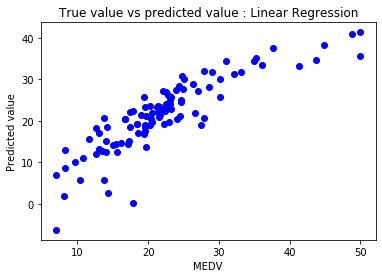

In [15]:
# Plotting a graph with our predicted values on the y axis and the real values on the x axis in order to evaluate our model
plt.scatter(Y_test , Y_pred, color = 'blue') 
plt.xlabel("MEDV") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 


     

In [16]:
# Determine the R2 score for our training subsample
Y_train_predict = model.predict(X_train)

r2 = r2_score(Y_train, Y_train_predict)
print('R2 score is {}'.format(r2))

R2 score is 0.738339392059052


In [17]:
# Determine the R2 score for our testing sample
Y_test_predict = model.predict(X_test)

r2 = r2_score(Y_test, Y_test_predict)
print('R2 score is {}'.format(r2))

R2 score is 0.7334492147453092


In [18]:
# Printing out the predicted value in the first column, the real values in second and the difference in the third column
for i in range(0, len(Y_test)):
    print(str(Y_pred[i])+ "--------------" + str(Y_test[i]) + "             Difference:    " + str(Y_test[i] - Y_pred[i]))
    

37.56311787385153--------------37.6             Difference:    0.03688212614846975
32.14445142742903--------------27.9             Difference:    -4.244451427429034
27.065736286192816--------------22.6             Difference:    -4.465736286192815
5.670806325121717--------------13.8             Difference:    8.129193674878284
35.099825772076116--------------35.2             Difference:    0.10017422792388686
5.858037009784127--------------10.4             Difference:    4.541962990215874
27.537085056340935--------------23.9             Difference:    -3.6370850563409363
31.81019187729471--------------29.0             Difference:    -2.8101918772947094
26.356347708572354--------------22.8             Difference:    -3.5563477085723534
22.772087484054733--------------23.2             Difference:    0.42791251594526614
31.911830475118876--------------33.2             Difference:    1.288169524881127
21.50224060707395--------------19.0             Difference:    -2.5022406070739507
23.701

# Which variables have the highest impact?

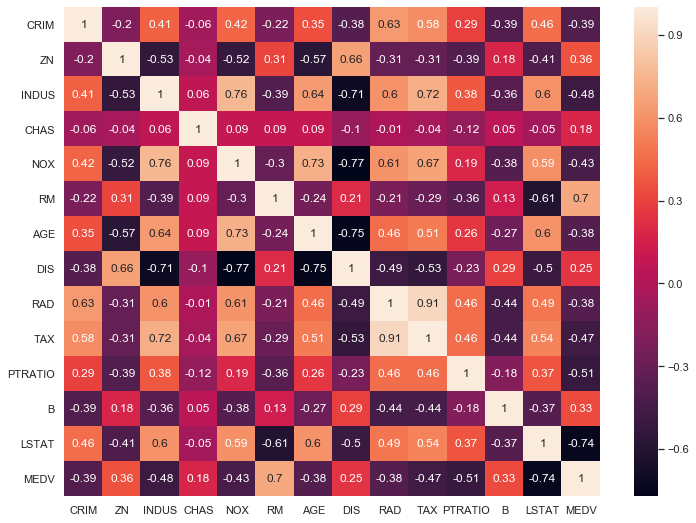

In [19]:
# Plotting a correlation matrix using the heatmap function from the seaborn library. The matrix measures the linear relationship between the variables
correlation_matrix = data.corr().round(2)
sns.set(rc={'figure.figsize':(12, 9)})
sns.heatmap(data=correlation_matrix, annot=True)

The correlation amtrix shows that LSTAT and rooms have the highest impact on the median value

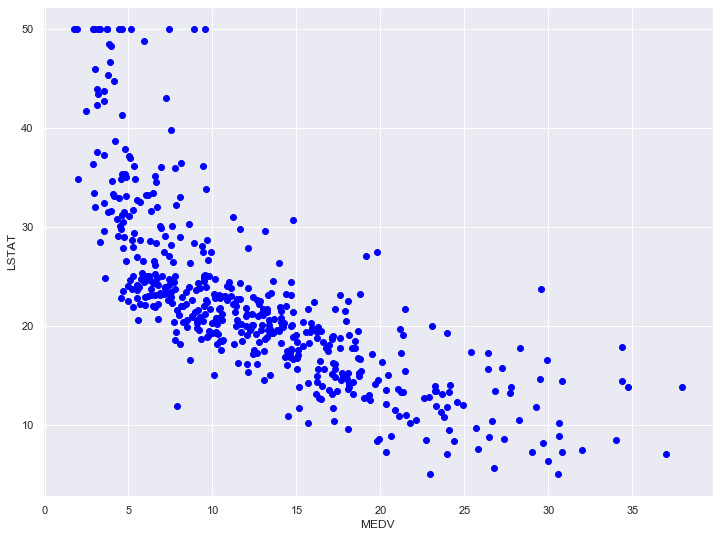

In [25]:
# Plotting the LSTAT on the y axis and MEDV on the x axis
plt.scatter(data['LSTAT'], data['MEDV'], color = 'blue')
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.show()

Text(0, 0.5, 'Rooms')

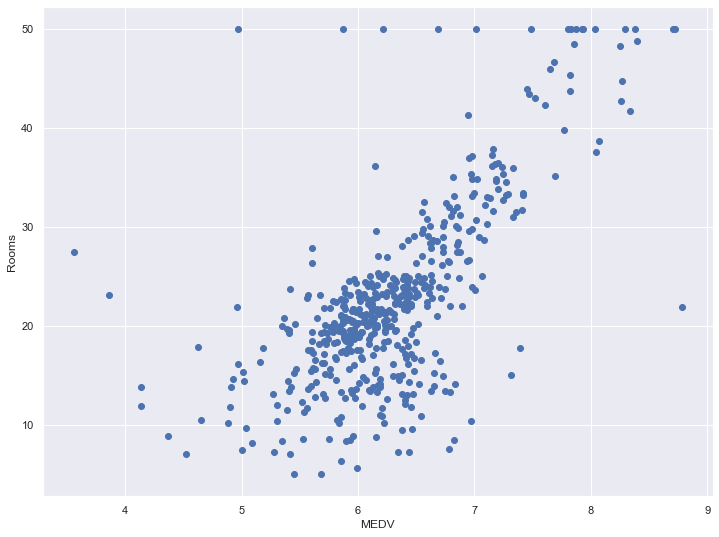

In [26]:
# Plotting the Rooms on the y axis and the MEDV on the x axis
plt.scatter(data['RM'], data['MEDV'])
plt.xlabel('MEDV')
plt.ylabel('Rooms')

In [27]:
# creating a new variable W with only the LSTAT and Room values
W = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])

Z = data['MEDV']

In [28]:
# splitting the data in training and test set again with a 80:20 ratio


W_train, W_test, Z_train, Z_test = sklearn.model_selection.train_test_split(W, Z, test_size = 0.2, random_state=5)

print(W_train.shape)

print(W_test.shape)

print(Z_train.shape)

print(Z_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [29]:
# applying the Linear Regression model with only the two values LSTAT and Rooms
model_two = LinearRegression()
model_two.fit(W_train, Z_train)
prediction_2 = model_two.predict(W_test)

In [32]:
for i in range(0, len(Y_test)):
    print(str(prediction_2[i])+ "--------------" + str(Y_test[i]) + "             Difference:    " + str(Y_test[i] - prediction_2[i]))

37.38999403450201--------------37.6             Difference:    0.21000596549799155
29.79290610929409--------------27.9             Difference:    -1.892906109294092
25.867552974668143--------------22.6             Difference:    -3.267552974668142
0.3137082808213769--------------13.8             Difference:    13.486291719178624
33.313855585417315--------------35.2             Difference:    1.886144414582688
7.971361018030155--------------10.4             Difference:    2.4286389819698453
30.70663870075809--------------23.9             Difference:    -6.806638700758093
27.830768420640396--------------29.0             Difference:    1.1692315793596038
26.26693081384288--------------22.8             Difference:    -3.466930813842879
21.978716779021443--------------23.2             Difference:    1.221283220978556
32.33149331676488--------------33.2             Difference:    0.8685066832351254
23.21791374203142--------------19.0             Difference:    -4.2179137420314206
22.99328889

In [30]:
# Determine the R2 score to evaluate the model
Z_train_predict = model_two.predict(W_train)

r2 = r2_score(Z_train, Z_train_predict)
print('R2 score is {}'.format(r2))



R2 score is 0.6300745149331701


In [59]:
"Evaluation for test set"
Z_test_predict = model_two.predict(W_test)



r2 = r2_score(Z_test, Z_test_predict)
print('R2 score is {}'.format(r2))

R2 score is 0.6628996975186954
